In [1]:
'''histogram plots
can be used to visualize a population in a simulation depending on a characteristic:
an histogram shows their repartition in different subpopulations with same characteristic value, 
and a curve shows the medium of another variable in each subpopulation
'''

'histogram plots\ncan be used to visualize a population in a simulation depending on a characteristic:\nan histogram shows their repartition in different subpopulations with same characteristic value, \nand a curve shows the medium of another variable in each subpopulation\n'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook


In [13]:
#READ DATA
file_position="data/example/2016166170154_drivers.csv"

with open(file_position , "r") as file :
    content=file.read()
    print("succeed")
data=content.split("\n")
legend=data[0].split(",")
del data[0]
for i,li in enumerate(legend):
    print(i," : ",li)

succeed
0  :  id_number
1  :  Ox
2  :  Oy
3  :  Dx
4  :  Dy
5  :  departure_t
6  :  value_of_time
7  :  repetition_time
8  :  watches
9  :  viewed_announces
10  :  matched
11  :  passenger
12  :  vks
13  :  detour
14  :  benefit


In [16]:
#DECIDE WHAT TO PLOT
X=[6]#[1,2,3,4]
fX=lambda x:x# a,z,e,r:np.sqrt((a-e)**2+(z-r)**2)#,y: np.sqrt(x*x+y*y)
Y=10
number_of_cut=30
sample=500


#special note: X can be a list of several positions f.e. 
#     and fX has to be a lambda function with same number of argument giving back only one number 
#     for example: in order to use the distance to the center, we can do:
# X=[1,2,3,4]
# fX=lambda a,z,e,r:np.sqrt((a-e)**2+(z-r)**2)

<IPython.core.display.Javascript object>


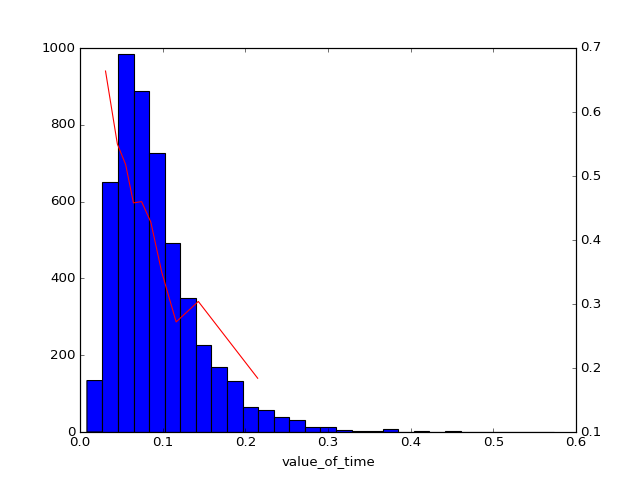

In [17]:
#PLOT

x,y,e=[],[],[]
for line in data:
    val=line.split(",")
    if len(val)>1:
        v=[]
        for Xi in X:
            v.append(float(val[Xi]))
        v=fX(*v)
        x.append(v)
        if val[Y] is '1':
            y.append(v)
            e.append((v,1))
        else:
            e.append((v,0))

            
fig = plt.figure()
ax = fig.add_subplot(111)

nx, bins,_ =ax.hist(x,number_of_cut)
ny,_=np.histogram(y,bins)
p=[y/x if x!=0 else None for x,y in zip(nx,ny)]
px=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
ax2=ax.twinx()
#ax2.plot(px,p,color='r')

e.sort()
q=[]
qx=[]
i=0
count=0
tot=0
list_x=[]
while(i<len(e)):
    count+=1
    tot+=e[i][1]
    list_x.append(e[i][0])
    if count % sample is 0:
        q.append(tot/count)
        tot,count=0,0
        qx.append(sum(list_x)/len(list_x))
        list_x=[]
    i+=1
if count>0:
    q.append(tot/count)
    qx.append(sum(list_x)/len(list_x))
ax2.plot(qx,q,color='r')    

for i,xi in enumerate(x):
    ax.set_xlabel(" ".join([legend[Xi] for Xi in X]))
plt.show()

In [18]:
#SAVE THE FIGURE
name=file_position[0:-4]+"_histogram_of_"+" ".join([legend[Xi] for Xi in X])
plt.savefig(name)